1: What is Simple Linear Regression?
- Simple Linear Regression is a statistical method used to model the relationship between two variables: one independent variable (predictor) and one dependent variable (response). It fits a straight line (y = mx + c) that best predicts the dependent variable based on the independent one.

2: What are the key assumptions of Simple Linear Regression?
- The key assumptions of Simple Linear Regression are:

 - Linearity: The relationship between independent and dependent variables is linear.

 - Independence: Observations are independent of each other.

 - Homoscedasticity: The variance of residuals is constant across all levels of the independent variable.

 - Normality: Residuals (errors) are normally distributed.

3: What is heteroscedasticity, and why is it important to address in regression models?
- Heteroscedasticity occurs when the variance of residuals changes across the range of the independent variable. It's important to address because it violates the assumption of constant variance, leading to unreliable estimates, biased standard errors, and incorrect hypothesis test results.

4: What is Multiple Linear Regression?
- Multiple Linear Regression is an extension of simple linear regression that models the relationship between one dependent variable and two or more independent variables. It fits a linear equation of the form:

Y = β₀ + β₁X₁ + β₂X₂ + ... + βnXn + ε,

where each β represents the effect of a predictor X on the outcome Y.

5: What is polynomial regression, and how does it differ from linear regression?
- Polynomial regression is a type of regression where the relationship between the independent and dependent variable is modeled as an nth-degree polynomial. Unlike linear regression, which fits a straight line, polynomial regression fits a curved line (e.g., quadratic, cubic) to capture non-linear patterns in the data.





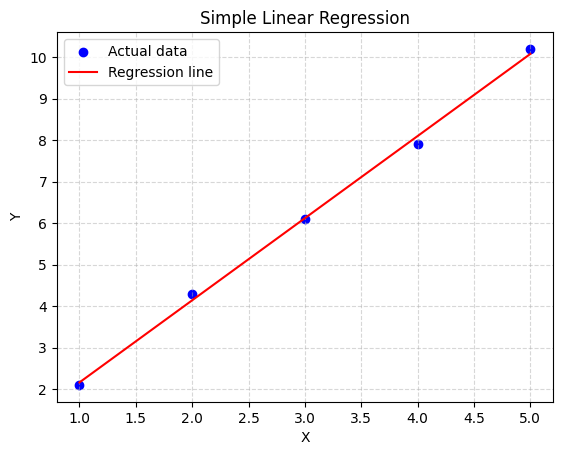

Slope (m): 1.98
Intercept (c): 0.18


In [1]:
'''Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and train model
model = LinearRegression()
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)

# Plotting
plt.scatter(X, Y, color='blue', label='Actual data')
plt.plot(X, Y_pred, color='red', label='Regression line')
plt.title("Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Print coefficients
print(f"Slope (m): {model.coef_[0]:.2f}")
print(f"Intercept (c): {model.intercept_:.2f}")


In [2]:
''' Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.
'''
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Sample data
data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

# Independent and dependent variables
X = data[['Area', 'Rooms']]
y = data['Price']

# Fit model
model = LinearRegression()
model.fit(X, y)

# Add constant for VIF
X_const = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print("Regression Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Area Coef: {model.coef_[0]:.2f}")
print(f"Rooms Coef: {model.coef_[1]:.2f}\n")

print("VIF Results:")
print(vif_data)


Regression Coefficients:
Intercept: 103157.89
Area Coef: 63.16
Rooms Coef: 34736.84

VIF Results:
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


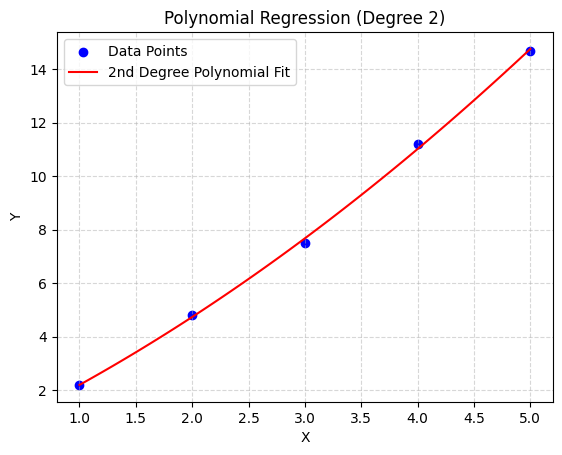

Model coefficients: [0.   1.94 0.2 ]
Intercept: 0.06000000000000938


In [3]:
''' Question 8: Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
3
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict using the model
X_range = np.linspace(1, 5, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
Y_pred = model.predict(X_range_poly)

# Plot
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X_range, Y_pred, color='red', label='2nd Degree Polynomial Fit')
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Coefficients
print("Model coefficients:", model.coef_)
print("Intercept:", model.intercept_)


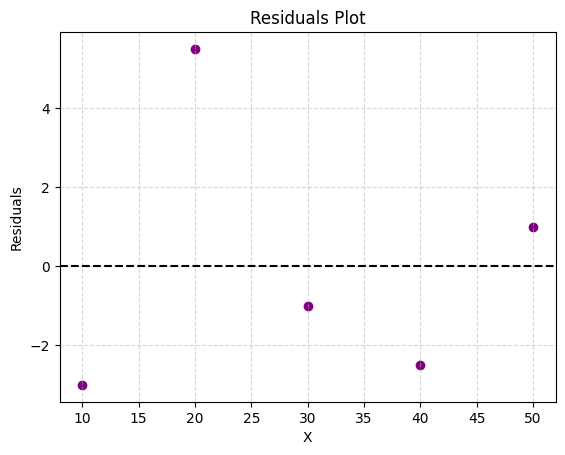

Residuals: [-3.   5.5 -1.  -2.5  1. ]


In [4]:
''' Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Train model
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Compute residuals
residuals = Y - Y_pred

# Plot residuals
plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("X")
plt.ylabel("Residuals")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Optional: print residuals
print("Residuals:", residuals)


Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

- To address heteroscedasticity and multicollinearity in a house price prediction model:

 - For Heteroscedasticity:
Transform the target variable – Apply log or square root transformation to house prices to stabilize variance.

Use robust regression methods – Switch to models like Ridge regression or use statsmodels with robust standard errors.

Add interaction or polynomial terms – Better capture non-linear effects that may be causing variance patterns.

Check residual plots – Reassess after corrections to ensure residual spread is uniform.

- For Multicollinearity:
Calculate VIF (Variance Inflation Factor) – Identify and quantify multicollinearity.

Drop or combine correlated features – For example, if Area and Rooms are highly correlated, keep one or create a ratio (e.g., area per room).

Use regularization – Apply Ridge or Lasso regression to reduce feature impact and stabilize coefficients.

PCA or feature engineering – Reduce dimensionality and remove redundancy without losing much information.

These steps help build a more interpretable, generalizable, and stable regression model.